<a href="https://colab.research.google.com/github/Suyash-K/Data_Science_Assignments/blob/main/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/StudentsPerformance2.csv", header=0)
df.columns = df.columns.str.strip().str.lower()
df

,sr no,gender,math_score,reading_score,writing_score,placement_score,club_join_date,placement offer letter,region
0,1,M,10,78,20,60,2019,1,Pune
1,2,F,64,85,69,96,2017,3,na
2,3,M,73,77,66,84,2017,2,Nashik
3,4,F,80,85,62,79,2020,2,Baramati
4,5,F,61,80,63,84,2018,2,Sambajinagar
5,6,M,99,90,80,101,2021,1,Pune
6,7,M,66,82,64,94,2020,3,na
7,8,F,64,84,65,88,2021,3,Baramati
8,9,M,66,75,68,92,2021,3,Pune
9,10,F,65,83,70,75,2018,2,na


In [ ]:
col = ['math_score', 'reading_score', 'writing_score', 'placement_score']

<Axes: >

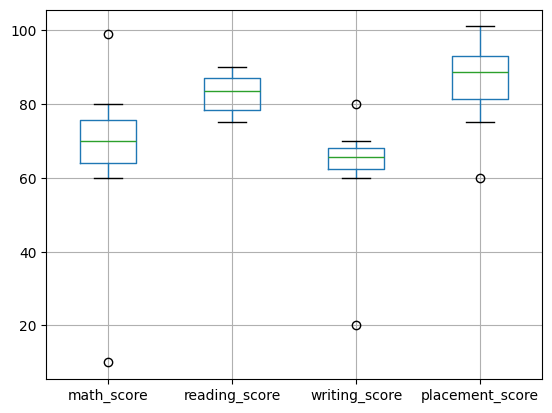

In [ ]:
df.boxplot(column=col)

In [ ]:
print(np.where(df['math_score']>90))

(array([5]),)


In [ ]:
print(np.where(df['reading_score']<25))

(array([], dtype=int64),)


In [ ]:
print(np.where(df['writing_score']<30))

(array([0]),)


In [ ]:
Q1 = df['math_score'].quantile(0.25)
Q1

64.0

In [ ]:
Q3 = df['math_score'].quantile(0.75)
Q3

75.5

In [ ]:
IQR = Q3 - Q1
IQR

11.5

In [ ]:
upper_bound = Q3 + 1.5 * IQR
upper_bound


92.75

In [ ]:
lower_bound = Q1 - 1.5 * IQR
lower_bound

46.75

In [ ]:
outliers = df[(df['math_score'] > upper_bound) | (df['math_score'] < lower_bound)]
outliers

,sr no,gender,math_score,reading_score,writing_score,placement_score,club_join_date,placement offer letter,region,log_math
0,1,M,10,78,20,60,2019,1,Pune,1.000000
5,6,M,99,90,80,101,2021,1,Pune,1.995635


<Axes: ylabel='Frequency'>

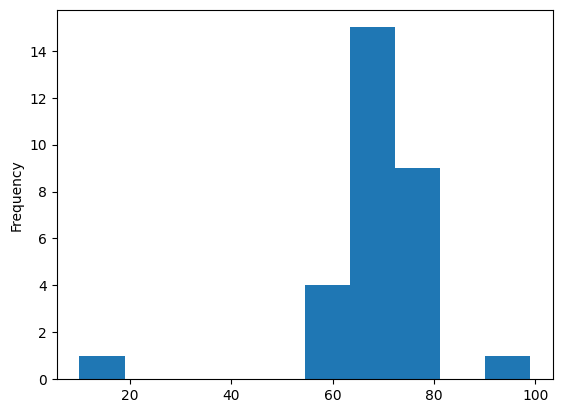

In [ ]:
import matplotlib.pyplot as plt
df['math_score'].plot(kind = 'hist')

In [ ]:
df['log_math'] = np.log10(df['math_score'])

<Axes: ylabel='Frequency'>

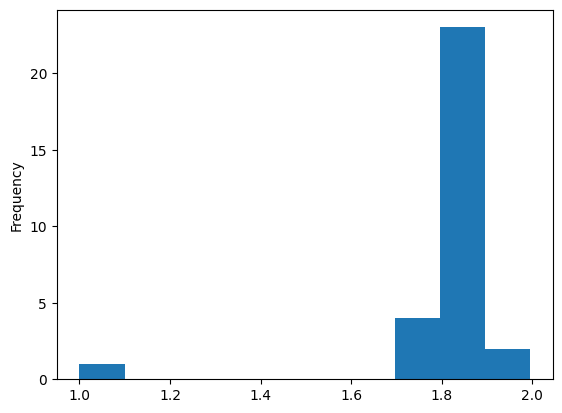

In [ ]:
df['log_math'].plot(kind = 'hist')

In [ ]:
import numpy as np
from scipy import stats

In [ ]:
z = np.abs(stats.zscore(df['math_score']))
print(z)

0     4.357334
1     0.323688
2     0.348587
3     0.871467
4     0.547779
5     2.290713
6     0.174293
7     0.323688
8     0.174293
9     0.248991
10    0.547779
11    0.722073
12    0.647375
13    0.722073
14    0.124495
15    0.323688
16    0.572678
17    0.622476
18    0.199192
19    0.099596
20    0.124495
21    0.273890
22    0.248991
23    0.647375
24    0.547779
25    0.124495
26    0.124495
27    0.323688
28    0.423284
29    0.647375
Name: math_score, dtype: float64


In [ ]:
threshold = 2

In [ ]:
sample_outliers = np.where(z > threshold)

In [ ]:
print(sample_outliers)

(array([0, 5]),)


In [ ]:
print(df.iloc[sample_outliers])

   sr no gender  math_score  reading_score  writing_score  placement_score  \
0      1      M          10             78             20               60   
5      6      M          99             90             80              101   

   club_join_date  placement offer letter region  log_math  
0            2019                       1   Pune  1.000000  
5            2021                       1   Pune  1.995635  
